In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas 
%config InlineBackend.figure_format ='retina'

In [2]:
oil = pd.read_csv('OilSpillsCsv.csv')
oil

,id,open_date,name,location,lat,lon,threat,tags,commodity,measure_skim,measure_shore,measure_bio,measure_disperse,measure_burn,max_ptl_release_gallons,posts,description
0,10431,2022-03-21,"Tug Vessel Loses Power, Grounds, and Leaks Die...","Neva Strait, Sitka, AK",57.270000,-135.593330,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"At approximately 0400 on 21-Mar02922, the tug ..."
1,10430,2022-03-17,Compromised Fuel Transfer Pipe Spills Oil into...,"Oswego, NY",43.459410,-76.531650,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"On March 17, 2022, NOAA ERD was notified by Mi..."
2,10429,2022-03-16,Floating Humpback Whale Carcass off of Carolin...,"Carolina Beach, NC, USA",34.031323,-77.830343,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"On March 16, 2022, the Gulf of Mexico Marine M..."
3,10428,2022-03-15,Containership Grounded off Gibson Island in Ch...,"Gibson Island, MD, USA",39.070000,-76.410000,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,"On 15 March 2022, USCG Sector Maryland NCR not..."
4,10426,2022-03-14,"Oil Pipeline Discharge into Cahokia Canal, Edw...","Cahokia Canal, Edwardsville, IL",38.824034,-89.974600,Oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"On March 14, 2022, USEPA Region 5 contacted th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,6204,1968-06-13,"World Glory; 65 miles ENE of Durban, South Africa","65 miles ENE of Durban, South Africa",-29.633300,32.250000,NaN,NaN,Kuwait crude oil,NaN,NaN,NaN,1.0,NaN,14000000.0,6,"At 1500 on June 13, 1968, the World Glory, bo..."
4206,6203,1968-03-07,"General Colocotronis; Eleuthera Island, Bahamas","Eleuthera Island, Bahamas",25.333300,-76.333300,NaN,NaN,"Venezuelan crude oil, diesel fuel",NaN,NaN,NaN,1.0,1.0,1550000.0,6,"On March 7, 1968, the Greek tank vessel Genera..."
4207,6202,1968-03-03,"Ocean Eagle; San Juan, Puerto Rico","San Juan, Puerto Rico",18.483300,-66.166700,NaN,NaN,Venezuelan light crude oil,NaN,NaN,NaN,1.0,NaN,2940000.0,15,"On the morning of March 3, 1968, the tanker Oc..."
4208,6201,1967-03-18,"Torrey Canyon; Lands End, England","Lands End, England",50.050000,-4.733330,NaN,NaN,Kuwait crude oil,NaN,NaN,NaN,1.0,1.0,36100000.0,5,"On the morning of March 18, 1967, the T/V Torr..."


In [3]:
oil.columns

Index(['id', 'open_date', 'name', 'location', 'lat', 'lon', 'threat', 'tags',
       'commodity', 'measure_skim', 'measure_shore', 'measure_bio',
       'measure_disperse', 'measure_burn', 'max_ptl_release_gallons', 'posts',
       'description'],
      dtype='object')

In [4]:
oil['open_date'] = pd.to_datetime(oil['open_date'],errors='raise')
oil['open_date']

0      2022-03-21
1      2022-03-17
2      2022-03-16
3      2022-03-15
4      2022-03-14
          ...    
4205   1968-06-13
4206   1968-03-07
4207   1968-03-03
4208   1967-03-18
4209   1957-03-29
Name: open_date, Length: 4210, dtype: datetime64[ns]

In [5]:
#states[(states['Date_dt']<pd.datetime(1790,1,1))].State_flower.value_counts().head(1)
oil=oil[oil['open_date']>pd.datetime(2020,1,1)]

/tmp/ipykernel_2659956/1133142094.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  oil=oil[oil['open_date']>pd.datetime(2020,1,1)]


In [6]:
oil=oil.fillna('NoData')
oiltx=oil[((oil['location'].str.contains('Texas'))|(oil['location'].str.contains('Tx'))|(oil['location'].str.contains('TX')))&~(oil['location'].str.contains('Texas Rd'))]
oiltx

,id,open_date,name,location,lat,lon,threat,tags,commodity,measure_skim,measure_shore,measure_bio,measure_disperse,measure_burn,max_ptl_release_gallons,posts,description
5,10424,2022-03-07,Ballast Water Tank Contaminated with Acetic Ac...,"Galveston, TX",29.308056,-94.803056,Chemical,NoData,Glacial Acetic Acid,NoData,NoData,NoData,NoData,NoData,8000.0,0,"On March 7, 2022, the USCG Marine Safety Unit ..."
65,10365,2021-10-07,Abandoned Platform - High Island Block 10; Off...,Offshore Texas,29.560278,-93.998056,Oil,NoData,oil,NoData,NoData,NoData,NoData,NoData,NoData,0,"On October 7, 2021 MSU Port Arthur IMD contact..."
75,10353,2021-09-12,"Tropical Storm Nicholas, Texas","Freeport, TX",28.953056,-95.288333,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,Tropical Storm Nicholas made landfall near Fre...
117,10309,2021-07-03,"2 barge collision Port Isabel, TX; 1200 Port R...","Port Isabel, TX",26.060600,-97.213600,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On July 3, 2021, the NOAA SSC received notific..."
127,10299,2021-06-17,"Baytown Ditch Discharge; Baytown, TX","Baytown, TX",29.711639,-94.979886,Oil,NoData,Light Crude Oil,NoData,NoData,NoData,NoData,NoData,1050.0,0,"On June 17, 2021 Sector Houston-Galveston cont..."
129,10297,2021-06-15,"West Cameron 551 Discharge; Offshore Texas, Gu...","Offshore Texas, Gulf of Mexico",28.306111,-93.269167,Oil,NoData,Condensate,NoData,NoData,NoData,NoData,NoData,NoData,0,"On June 14, 2021, a sheen from an unknown sour..."
144,10280,2021-05-14,M/V Toya Adrift; Offshore Texas,Offshore Texas,27.148333,-94.570000,Oil,NoData,"Heavy Fuel Oil, Marine Grade Diesel",NoData,NoData,NoData,NoData,NoData,999999.0,0,"On May 14, 2021 the M/T Toyo lost propulsion a..."
235,10183,2020-10-13,High Island 330 Sheen; Offshore Texas,Offshore Texas,28.097338,-93.502742,Oil,NoData,Diesel,NoData,NoData,NoData,NoData,NoData,2000.0,0,"On October 13, 2020 a light sheen was noted ne..."
236,10184,2020-10-13,"Trinity Bay Anomalies (MPSR); Chambers County,...","Chambers County, TX, USA",29.681389,-94.790833,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On October 13, 2020, NESDIS issued two Marine ..."
262,10155,2020-08-25,Hurricane Laura; Texas and Louisiana,Texas and Louisiana,29.674167,-93.833611,Other,NoData,Oil,NoData,NoData,NoData,NoData,NoData,NoData,0,Hurricane Laura is forecast to make landfall o...


In [7]:
pd.options.display.max_rows=177
oiltx['location'].value_counts()

Offshore Texas                               3
Freeport, TX                                 2
Galveston, TX                                1
Port Isabel, TX                              1
Baytown, TX                                  1
Offshore Texas, Gulf of Mexico               1
Chambers County, TX, USA                     1
Texas and Louisiana                          1
Corpus Christi Inner Harbor, TX              1
111 Red Bluff Rd, Pasadena, TX 77506, USA    1
Port Bolivar, TX                             1
Baytown, TX 77520, USA                       1
Galveston, TX, USA                           1
Name: location, dtype: int64

In [8]:
oil=oil.fillna('NoData')
oilla=oil[((oil['location'].str.contains('Louisiana'))|(oil['location'].str.contains('La'))|(oil['location'].str.contains('LA')))]
oilla
#&~(oil['location'].str.contains('Texas Rd'))

,id,open_date,name,location,lat,lon,threat,tags,commodity,measure_skim,measure_shore,measure_bio,measure_disperse,measure_burn,max_ptl_release_gallons,posts,description
11,10418,2022-02-11,Satellite Imagery Detects Oil Anomaly at Inact...,55 miles offshore LA (GOM),28.275070,-91.092900,Oil,NoData,oil and completion fluids,0.0,NoData,NoData,NoData,NoData,NoData,0,"On February 11, 2022, the NOAA SSC received a ..."
12,10416,2022-02-10,Ongoing Air Discharge from Chemical Plant due ...,"Westlake, LA",30.249722,-93.287500,Chemical,NoData,"tri-, tetra-, pentachloroethanes",NoData,NoData,NoData,NoData,NoData,NoData,0,"On February 10, 2022, MSU Lake Charles notifie..."
13,10415,2022-02-08,"Discharge of Crude Oil at Liquid Oxygen Plant,...","Mud Lake, LA",29.483889,-89.993889,Oil,NoData,oil,1.0,NoData,NoData,NoData,NoData,420.0,0,"On 8 FEB 2022, the NOAA SSC was contacted by t..."
24,10404,2022-01-12,Diesel Spill along Mississippi River Gulf Outl...,"New Orleans, LA, USA",29.986267,-89.901456,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On December 27, 2021, over 7,000bbl of diese..."
25,10403,2022-01-10,"Spill from Quarter North Oil Well, Louisiana, ...","LA, Gulf of Mexico",28.970556,-89.500278,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On January 10, 2022, the USCG Sector New Orlea..."
32,10397,2021-12-17,Fishing Vessel Spills Red Dye Diesel at Quileu...,"Quileute Marina, La Push, WA, USA",47.911267,-124.636710,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,On the morning of 17th DEC an unknown amount o...
40,10389,2021-11-30,Southern Louisiana Oil Platform Breton Sound R...,"LA, Gulf of Mexico",29.465000,-89.166667,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On November 30, 2021, a USCG Sector New Orlean..."
43,10387,2021-11-25,Crude Oil Spill within Delta National Wildlife...,"Venice, LA, USA",29.276389,-89.245556,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On November 22, 2021, the Texas Petroleum Inve..."
48,10381,2021-11-05,SLOMEN CHENIMUS Mississippi River drum release...,"Garyville, LA, USA",30.046080,-90.642920,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On Nov 5 2021, the vessel SLOMEN CHENIMUS lost..."
63,10366,2021-10-10,Unkown Sheen Niagara River; 15000 Niagara Pkwy...,"Niagara-on-the-Lake, Canada",43.189333,-79.054333,Other,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"At 2030 eastern time on October 10th, the NOAA..."


In [9]:
oilla['location'].value_counts()

LA, USA                                                             10
Venice, LA, USA                                                      8
LA, Gulf of Mexico                                                   4
Venice, LA 70091, USA                                                3
Gulf of Mexico, LA, USA                                              3
New Orleans, LA, USA                                                 2
Venice, LA USA                                                       1
298 S Fort Lauderdale Beach Blvd, Fort Lauderdale, FL 33316, USA     1
101 Ocean Lake Way, Ocean Shores, WA 98569, USA                      1
Texas and Louisiana                                                  1
Main Pass 35, LA, USA                                                1
Bayou Bienvenue, New Orleans, LA, USA                                1
Chalmette, LA, USA                                                   1
Louisiana                                                            1
Jeaner

In [10]:
oil=oil.fillna('NoData')
oilms=oil[((oil['location'].str.contains('Mississippi'))|(oil['location'].str.contains('Ms'))|(oil['location'].str.contains('MS')))]
oilms

,id,open_date,name,location,lat,lon,threat,tags,commodity,measure_skim,measure_shore,measure_bio,measure_disperse,measure_burn,max_ptl_release_gallons,posts,description
14,10417,2022-02-08,"Discharge of Crude Oil from Transfer Pipeline,...","SW Pass, Mississippi River Delta",29.037500,-89.281389,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On February 8, 2022, the NOAA Regional Respons..."
19,10410,2022-01-28,Small Spill from Recreational Vessel near Bay ...,"Bay St Louis, MS",30.332476,-89.394576,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On 28 JAN 2022, USCG Sector Mobile contacted t..."
122,10304,2021-06-28,"Mystery Spill- Back Bay Biloxi; Biloxi, MS, USA","Biloxi, MS, USA",30.417720,-88.866577,Oil,NoData,oil,1.0,1.0,NoData,NoData,NoData,50.0,0,On 28 JUN USCG Sector Mobile IMD notified SSC ...
308,10108,2020-06-22,T/V Aquila Vegetable Oil Spill; Mississippi Ri...,"Mississippi River, MM 98, LA",29.910167,-90.097111,Other,NoData,Vegetable Oil,NoData,NoData,NoData,NoData,NoData,NoData,0,"On June 20, 2020, the USCG Sector New Orleans ..."
383,10032,2020-01-24,50 gal diesel spill Old Fort Bayou NRC 1269451...,"Ocean Springs, MS",30.419132,-88.827474,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"At 1300 on 24 JAN 2020, USCG Sector Mobile not..."


In [11]:
oilms['location'].value_counts()

SW Pass, Mississippi River Delta    1
Bay St Louis, MS                    1
Biloxi, MS, USA                     1
Mississippi River, MM 98, LA        1
Ocean Springs, MS                   1
Name: location, dtype: int64

In [12]:
oil=oil.fillna('NoData')
oilal=oil[((oil['location'].str.contains('Alabama'))|(oil['location'].str.contains('Al'))|(oil['location'].str.contains('AL')))&~(oil['location'].str.contains('Alaska'))&~(oil['location'].str.contains('MS'))&~(oil['location'].str.contains('Alaska'))]
oilal

,id,open_date,name,location,lat,lon,threat,tags,commodity,measure_skim,measure_shore,measure_bio,measure_disperse,measure_burn,max_ptl_release_gallons,posts,description
7,10422,2022-02-24,Barge Carrying Styrene Grounded on Tombigbee R...,"Pickensville, AL, USA",33.254597,-88.304680,Chemical,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On February 24, 2022, the USCG Sector Mobile n..."
104,10322,2021-07-18,"FV MT PAVLOF; Point Alava, Ketchikan, AK","Point Alava, Ketchikan, AK",55.196582,-131.162217,Oil,NoData,diesel,NoData,NoData,NoData,NoData,NoData,600.0,0,"On 18-Jul-2021, the FV Mount Pavlof hit a rock..."
105,10321,2021-07-16,"Recreational Vessel on Fire; Alpena County, MI...","Alpena County, MI, USA",45.033500,-83.381333,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On July 16, 2021, the USCG Sector SOO notified..."
376,10036,2020-02-03,"GARROW BEND Sunken Tug; Mobile River, AL","Mobile River, AL",30.655199,-88.042999,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On February 3, 2020, the USCG Sector Mobile no..."


In [13]:
oilal['location'].value_counts()

Pickensville, AL, USA         1
Point Alava, Ketchikan, AK    1
Alpena County, MI, USA        1
Mobile River, AL              1
Name: location, dtype: int64

In [14]:
oil=oil.fillna('NoData')
oilfl=oil[((oil['location'].str.contains('Florida'))|(oil['location'].str.contains('FL'))|(oil['location'].str.contains('Fl')))]
oilfl
#&~(oil['location'].str.contains('Alaska'))&~(oil['location'].str.contains('MS'))&~(oil['location'].str.contains('Alaska'))

,id,open_date,name,location,lat,lon,threat,tags,commodity,measure_skim,measure_shore,measure_bio,measure_disperse,measure_burn,max_ptl_release_gallons,posts,description
6,10423,2022-03-02,"Ethanol Release in Port of Palm Beach, FL","Riviera Beach, FL, USA",26.768562,-80.049700,Other,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"Om March 2, 2022, the USCG notified the NOAA S..."
15,10413,2022-02-04,"Tug Sea Eagle aground Deerfield Beach, FL","Deerfield Beach, FL",26.316498,-80.074582,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On February 4, 2022, the USCG contacted the SS..."
16,10414,2022-02-03,"Pipeline Chronic Release on Stock Island, Key ...","Key West, FL",24.572885,-81.750212,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,USCG contacted the SSC on 3 Feb 2022 for suppo...
132,10294,2021-06-08,"Petroleum and Ethyl Ether Hazmat Fleming Key, ...","Mustin St, Key West, FL 33040, USA",24.568826,-81.794972,Chemical,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On June 8, 2021, the US Navy called with a req..."
155,10269,2021-04-25,"M/V Pepin Express; )ffshore Pompano Beach, FL",")ffshore Pompano Beach, FL",26.184046,-79.857617,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On April 25, 2021, the USCG Sector Miami conta..."
167,10257,2021-03-23,St Johns South Jetty Barge Grounding; Jacksonv...,"Jacksonville, FL",30.376000,-81.451833,Other,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On March 23, 2021, The barge Bridgeport ground..."
169,10253,2021-03-19,"MY La Dolce Vita; Monroe County, FL, USA","Monroe County, FL, USA",24.616944,-82.136167,Oil,NoData,diesel,NoData,NoData,NoData,NoData,NoData,4500.0,1,"On March 16, 2021, the 100-foot Yacht La Dolce..."
251,10168,2020-09-10,"M/T Monsoon; Upper Florida Keys, USA","Upper Florida Keys, USA",24.886436,-80.197449,Chemical,Adrift,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On September 9, 2020, USCG Sector Key West no..."
253,10166,2020-09-02,Mystery waxy material on Fort Lauderdale Beach...,"298 S Fort Lauderdale Beach Blvd, Fort Lauderd...",26.119680,-80.103810,Other,NoData,non petroleum oil,NoData,NoData,NoData,NoData,NoData,NoData,0,"On September 2, 2020, the USCG Sector Miami ca..."
319,10097,2020-06-04,"M/V Hoegh Xiamen; Intermodal Dr, Jacksonville,...","Intermodal Dr, Jacksonville, FL 32226, USA",30.404600,-81.546700,Oil,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,0,"On June 4, 2020, the Coast Guard Sector Jackso..."


In [15]:
oilfl['location'].value_counts()

Riviera Beach, FL, USA                                              1
Deerfield Beach, FL                                                 1
Key West, FL                                                        1
Mustin St, Key West, FL 33040, USA                                  1
)ffshore Pompano Beach, FL                                          1
Jacksonville, FL                                                    1
Monroe County, FL, USA                                              1
Upper Florida Keys, USA                                             1
298 S Fort Lauderdale Beach Blvd, Fort Lauderdale, FL 33316, USA    1
Intermodal Dr, Jacksonville, FL 32226, USA                          1
Name: location, dtype: int64

In [16]:
import pandas as pd

In [17]:
pwd

'/users/jramzy/ds_1300_notebooks/work'

In [18]:
Finaloil = pd.read_csv('Final Data Set.csv')
Finaloil

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft)
0,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,27-Dec-21,Enterococcus,1.00,MPN/100ml,2
1,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,27-Dec-21,Enterococcus,2.15,MPN/100ml,2
2,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,13-Dec-21,Enterococcus,2.15,MPN/100ml,2
3,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,13-Dec-21,Enterococcus,1.00,MPN/100ml,2
4,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,29-Nov-21,Enterococcus,2.15,MPN/100ml,2
...,...,...,...,...,...,...,...,...,...,...,...
215,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,13-Apr-21,Enterococcus,10.00,MPN/100ml,2
216,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,30-Mar-21,Enterococcus,31.00,MPN/100ml,2
217,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,16-Mar-21,Enterococcus,10.00,MPN/100ml,2
218,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,02-Mar-21,Enterococcus,10.00,MPN/100ml,2


In [19]:
Finaloil['Date_dt'] = pd.to_datetime(Finaloil['Record Date'],errors='raise')
Finaloil['Date_dt']
Finaloil['DateInt']=Finaloil['Date_dt'].astype(int)/10e10

In [20]:
Finaloil=Finaloil.sort_values(by='Date_dt')

In [21]:
#Table 1
Finaloil[Finaloil['Project ID']==1]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
16,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,20-Sep-21,Enterococcus,1.00,MPN/100ml,2,2021-09-20,16320960.0
17,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,20-Sep-21,Enterococcus,4.16,MPN/100ml,2,2021-09-20,16320960.0
15,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,27-Sep-21,Enterococcus,4.78,MPN/100ml,2,2021-09-27,16327008.0
14,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,27-Sep-21,Enterococcus,10.00,MPN/100ml,2,2021-09-27,16327008.0
12,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,04-Oct-21,Enterococcus,5.49,MPN/100ml,2,2021-10-04,16333056.0
13,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,04-Oct-21,Enterococcus,10.00,MPN/100ml,2,2021-10-04,16333056.0
11,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,18-Oct-21,Enterococcus,10.00,MPN/100ml,2,2021-10-18,16345152.0
10,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,18-Oct-21,Enterococcus,5.62,MPN/100ml,2,2021-10-18,16345152.0
9,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,01-Nov-21,Enterococcus,4.64,MPN/100ml,2,2021-11-01,16357248.0
8,1,10353,TX647885,Surfside,"Freeport, Tx",Brazoria,01-Nov-21,Enterococcus,1.00,MPN/100ml,2,2021-11-01,16357248.0


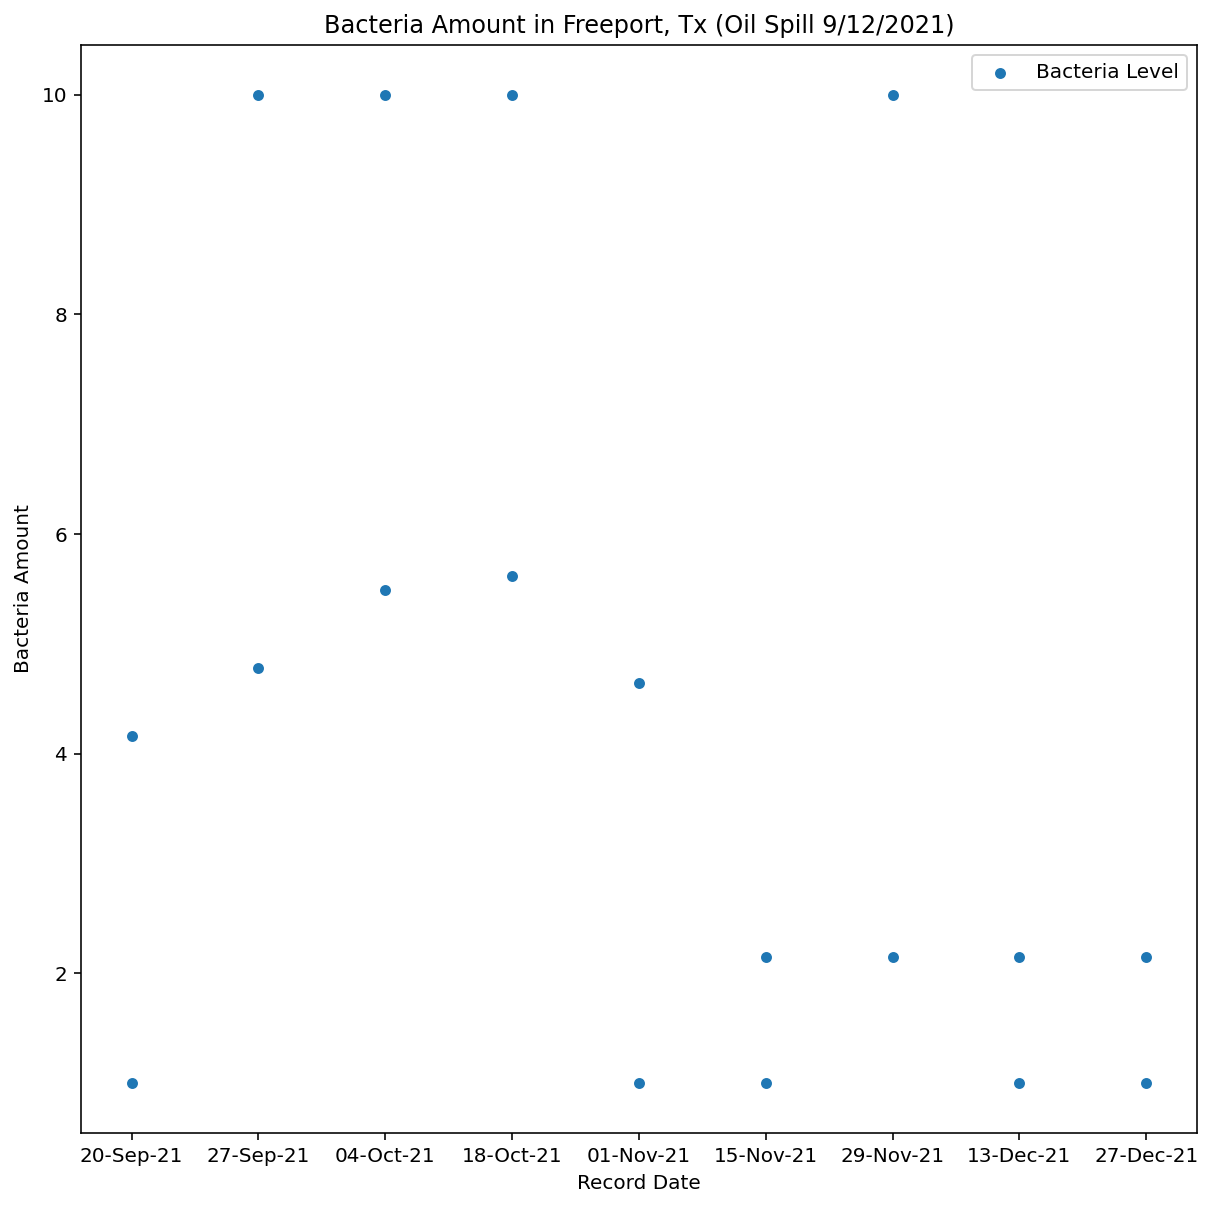

In [22]:
#Graph 1
Finaloil[Finaloil['Project ID']==1].plot.scatter(x='Record Date', y='Bacteria Amount',label="Bacteria Level",title="Bacteria Amount in Freeport, Tx (Oil Spill 9/12/2021)",figsize=(10,10));

In [23]:
#Table 2
Finaloil[Finaloil['Project ID']==2]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
58,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,12-Jul-21,Enterococcus,192.56,MPN/100ml,2,2021-07-12,16260480.0
59,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,12-Jul-21,Enterococcus,31.00,MPN/100ml,2,2021-07-12,16260480.0
56,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,19-Jul-21,Enterococcus,297.31,MPN/100ml,2,2021-07-19,16266528.0
57,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,19-Jul-21,Enterococcus,10.00,MPN/100ml,2,2021-07-19,16266528.0
54,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,21-Jul-21,Enterococcus,465.00,MPN/100ml,2,2021-07-21,16268256.0
55,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,21-Jul-21,Enterococcus,266.00,MPN/100ml,2,2021-07-21,16268256.0
52,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,23-Jul-21,Enterococcus,30.00,MPN/100ml,2,2021-07-23,16269984.0
53,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,23-Jul-21,Enterococcus,301.99,MPN/100ml,2,2021-07-23,16269984.0
51,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,26-Jul-21,Enterococcus,20.00,MPN/100ml,2,2021-07-26,16272576.0
50,2,10299,TX412536,Sylvan Beach Park,"Baytown, Tx",HARRIS,26-Jul-21,Enterococcus,245.08,MPN/100ml,2,2021-07-26,16272576.0


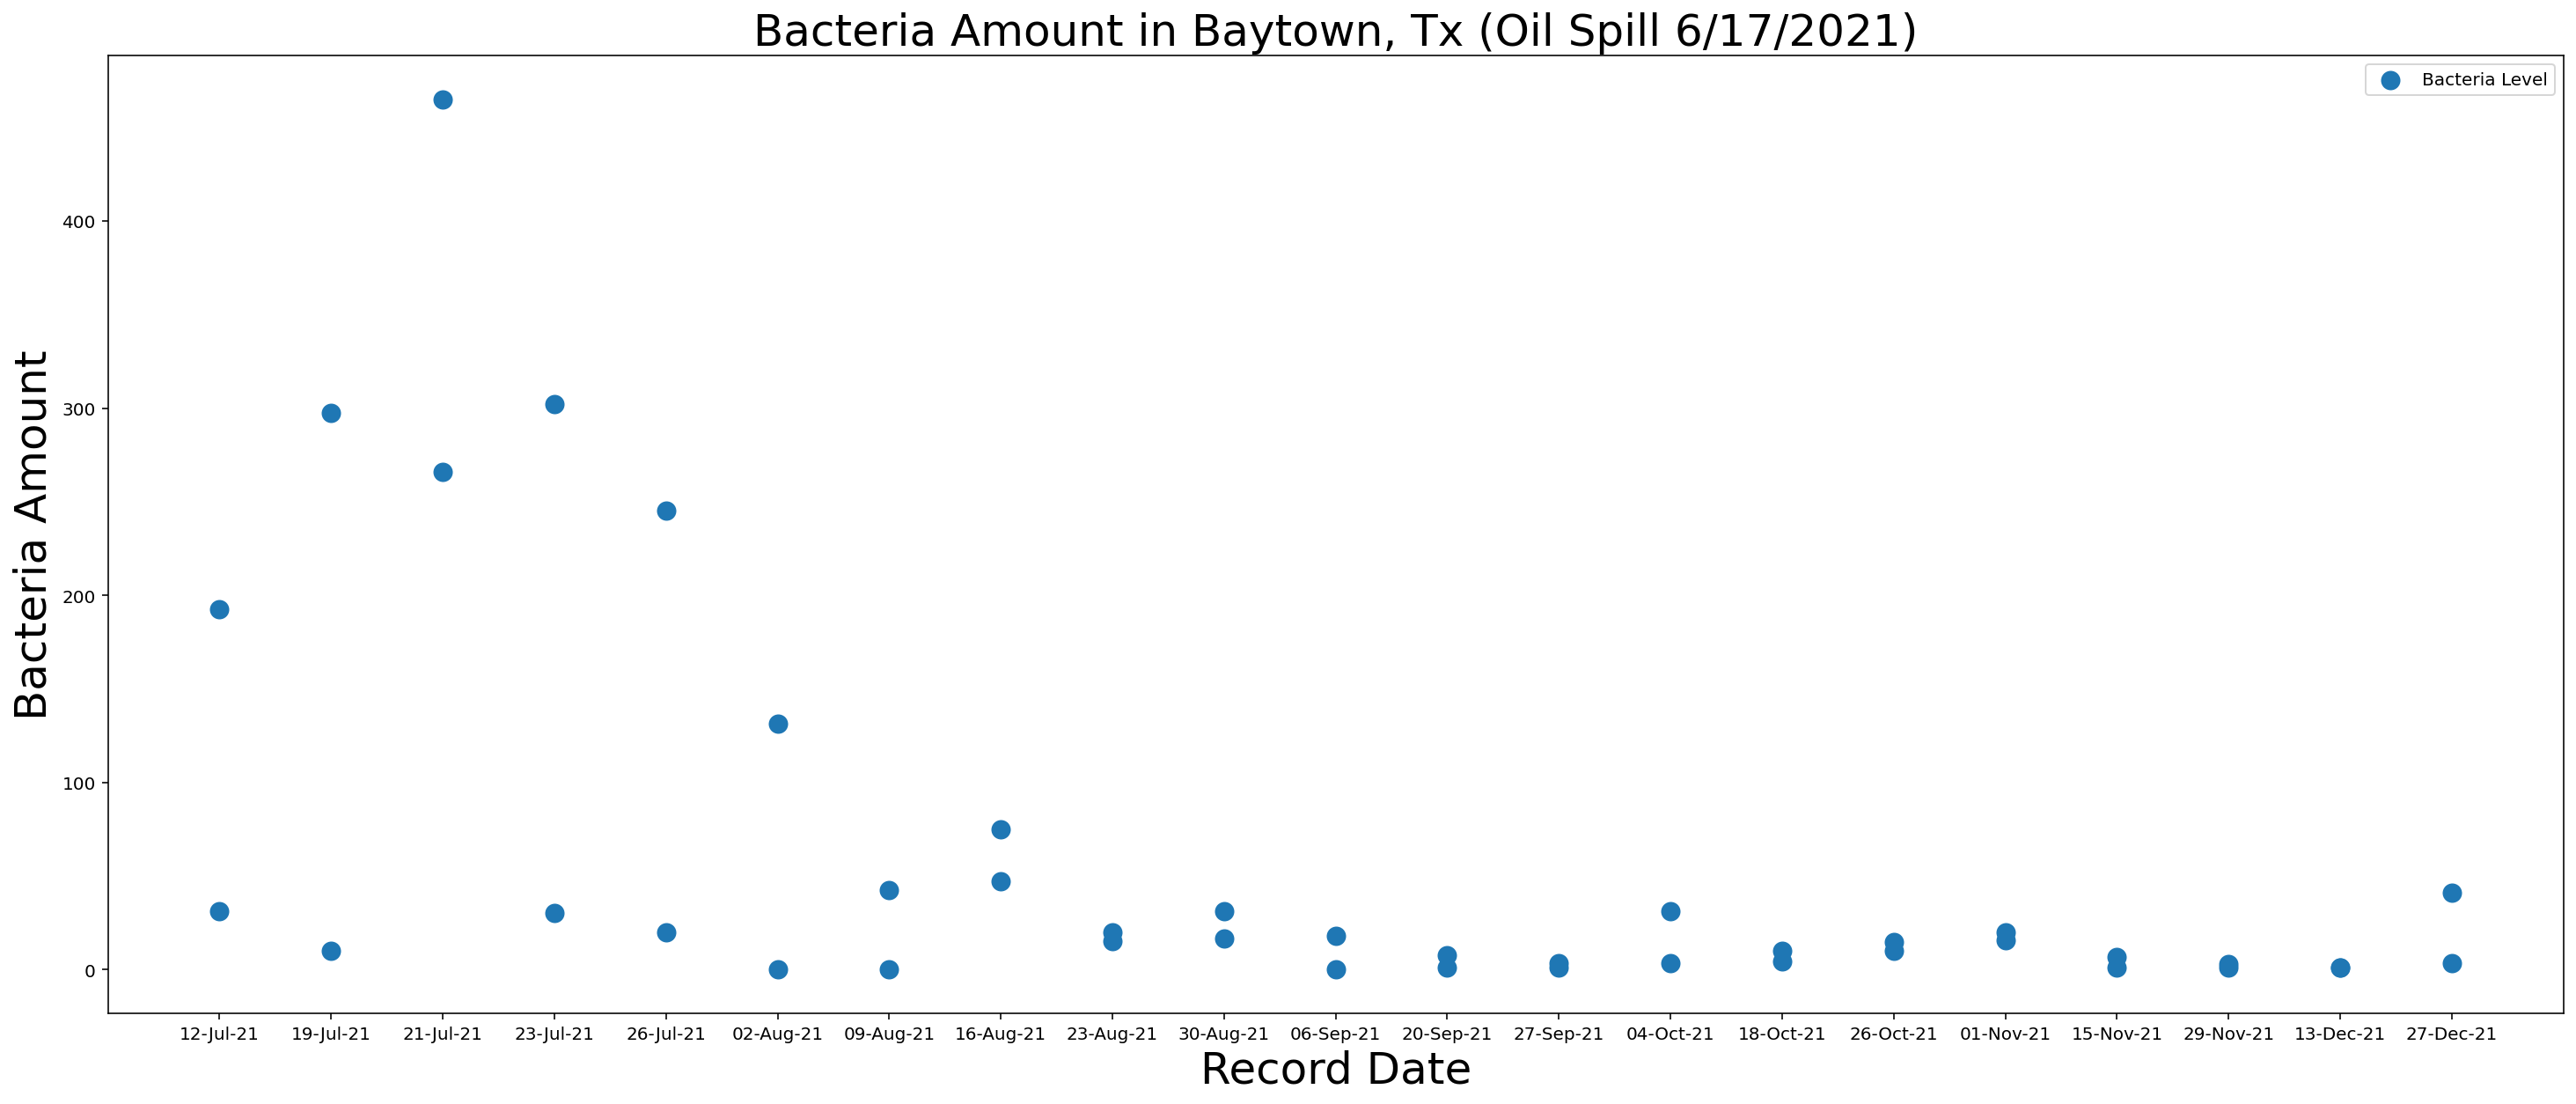

In [24]:
#Graph 2  - include saying tourism is much more than oil spill
ax2=Finaloil[Finaloil['Project ID']==2].plot.scatter(x='Record Date', y='Bacteria Amount',s=100,label="Bacteria Level",title="Bacteria Amount in Baytown, Tx (Oil Spill 6/17/2021)",figsize=(25,10));
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(25)
#fig.add_subplot(ax2)
#fig.savefig("graph2.pdf")

In [25]:
#Table 3
Finaloil[Finaloil['Project ID']==3]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
92,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,28-Jun-21,Enterococcus,77.00,MPN/100ml,2,2021-06-28,16248384.0
91,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,06-Jul-21,Enterococcus,99.82,MPN/100ml,2,2021-07-06,16255296.0
90,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,06-Jul-21,Enterococcus,283.00,MPN/100ml,2,2021-07-06,16255296.0
89,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,10-Jul-21,Enterococcus,496.00,MPN/100ml,2,2021-07-10,16258752.0
88,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,10-Jul-21,Enterococcus,107.11,MPN/100ml,2,2021-07-10,16258752.0
87,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,12-Jul-21,Enterococcus,40.00,MPN/100ml,2,2021-07-12,16260480.0
86,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,12-Jul-21,Enterococcus,93.05,MPN/100ml,2,2021-07-12,16260480.0
85,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,20-Jul-21,Enterococcus,8164.00,MPN/100ml,2,2021-07-20,16267392.0
84,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,20-Jul-21,Enterococcus,328.14,MPN/100ml,2,2021-07-20,16267392.0
82,3,10152,TX546628,North Beach - Main,"Corpus Christi, Tx",NUECES,22-Jul-21,Enterococcus,20.00,MPN/100ml,2,2021-07-22,16269120.0


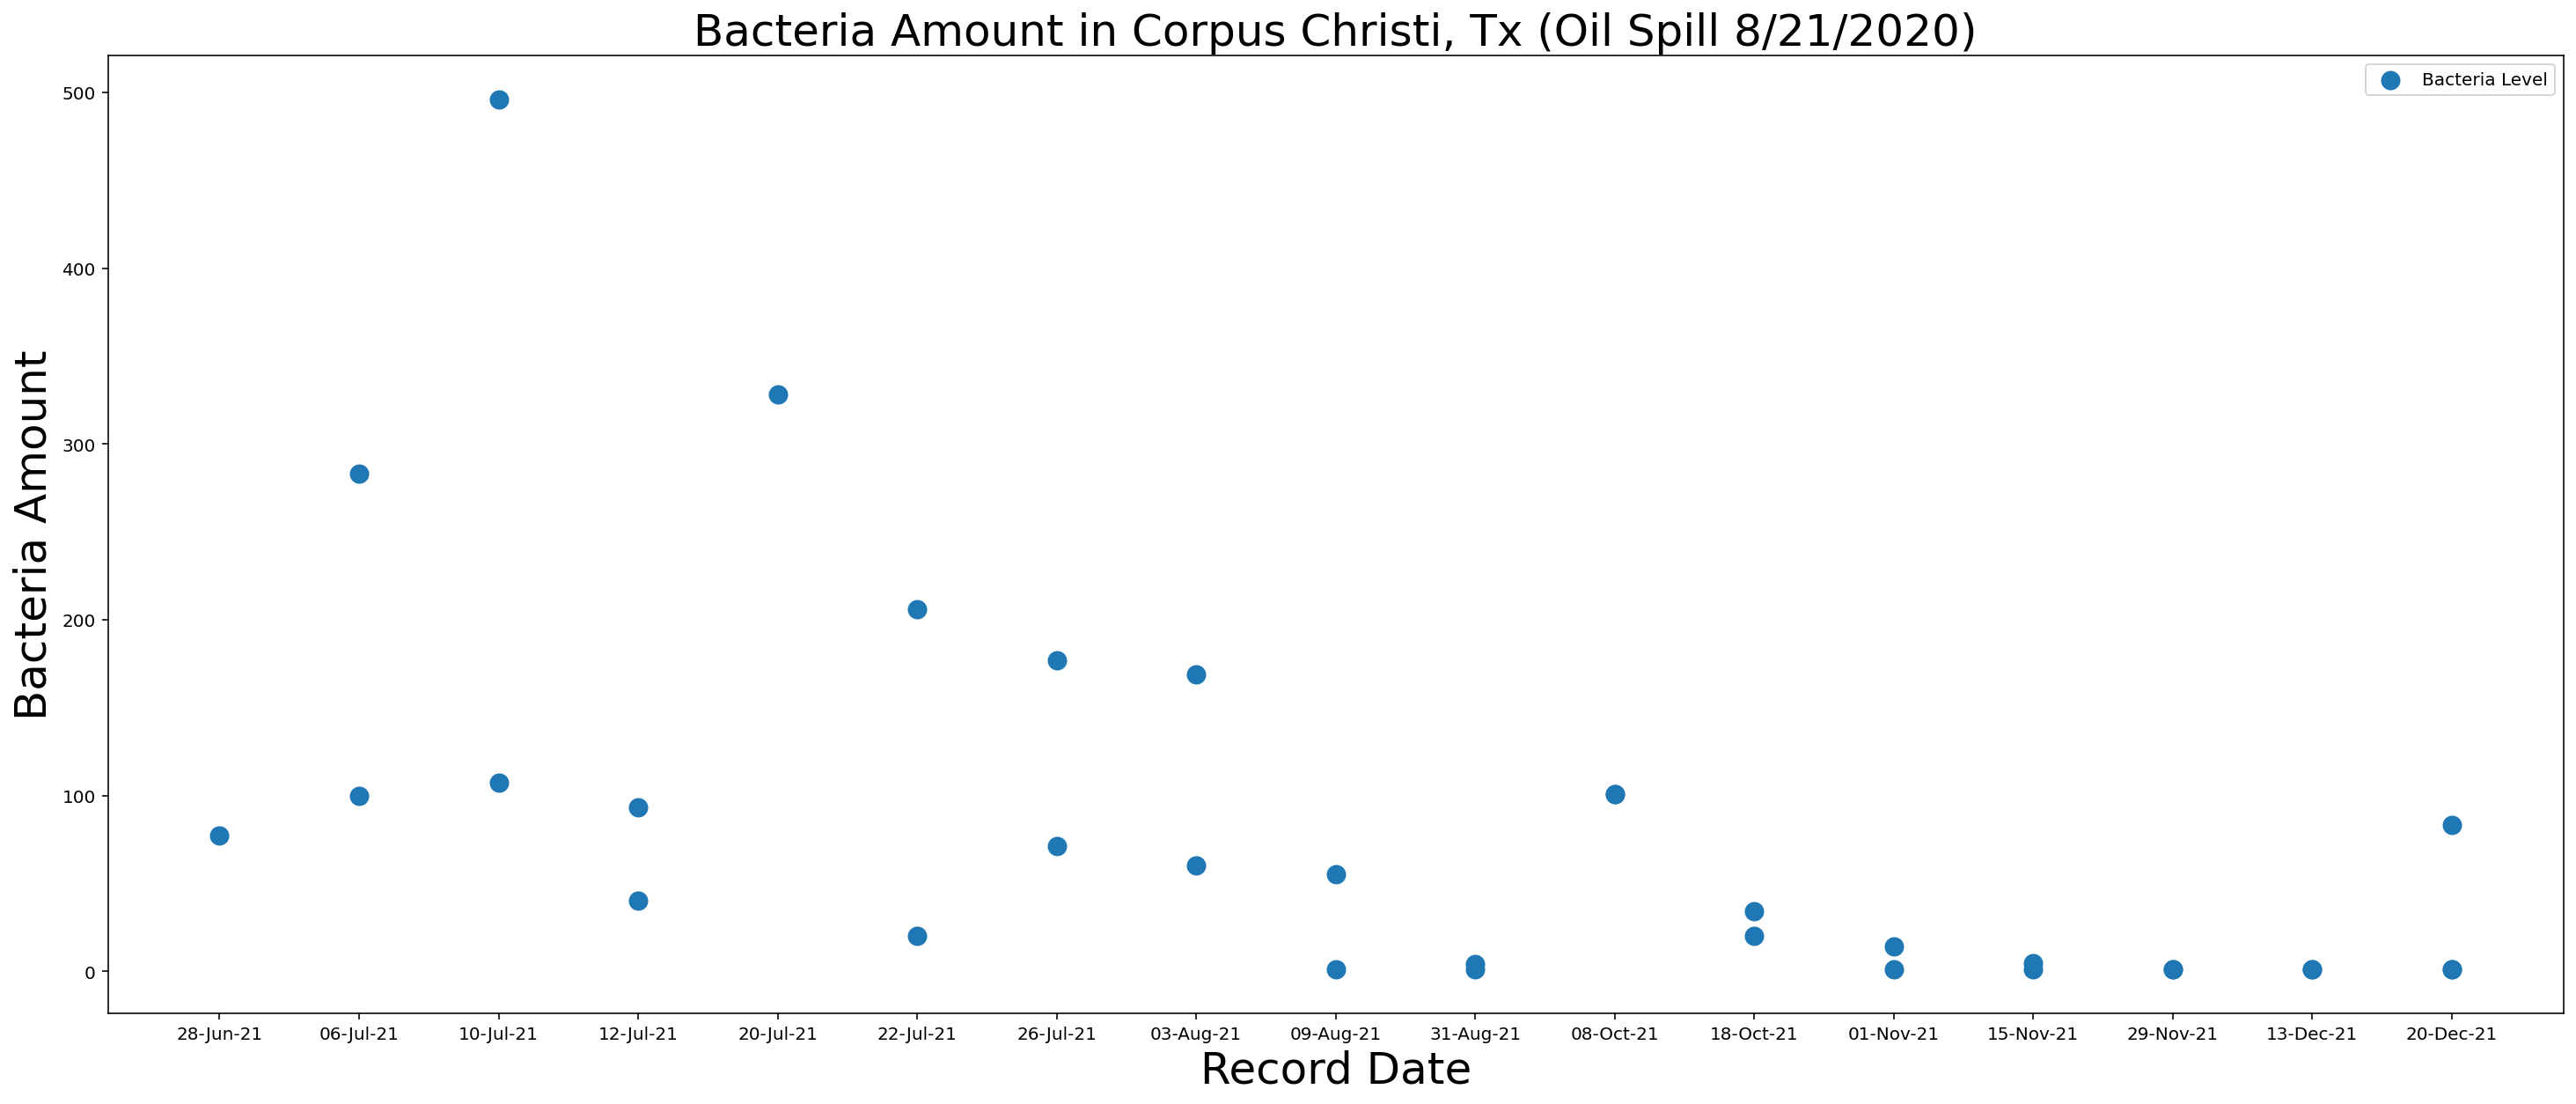

In [26]:
#Graph 3 - include to show tourism is worse than oil
ax3=Finaloil[Finaloil['Project ID']==3].drop([85]).plot.scatter(x='Record Date', y='Bacteria Amount',s=100,label="Bacteria Level",title="Bacteria Amount in Corpus Christi, Tx (Oil Spill 8/21/2020)",figsize=(25,10));
ax3.xaxis.label.set_fontsize(25)
ax3.yaxis.label.set_fontsize(25)
ax3.title.set_fontsize(25)

In [27]:
#Table 4
Finaloil[Finaloil['Project ID']==4]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
138,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,10-Jun-21,Enterococcus,59.12,MPN/100ml,2,2021-06-10,16232832.0
139,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,10-Jun-21,Enterococcus,20.00,MPN/100ml,2,2021-06-10,16232832.0
137,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,15-Jun-21,Enterococcus,5.00,MPN/100ml,2,2021-06-15,16237152.0
136,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,15-Jun-21,Enterococcus,59.12,MPN/100ml,2,2021-06-15,16237152.0
134,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,24-Jun-21,Enterococcus,259.00,MPN/100ml,2,2021-06-24,16244928.0
135,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,24-Jun-21,Enterococcus,37.07,MPN/100ml,2,2021-06-24,16244928.0
133,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,26-Jun-21,Enterococcus,5.00,MPN/100ml,2,2021-06-26,16246656.0
132,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,26-Jun-21,Enterococcus,34.15,MPN/100ml,2,2021-06-26,16246656.0
130,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,29-Jun-21,Enterococcus,26.86,MPN/100ml,2,2021-06-29,16249248.0
131,4,10099,TX164090,Texas City Dike,"Bolivar, Tx",GALVESTON,29-Jun-21,Enterococcus,5.00,MPN/100ml,2,2021-06-29,16249248.0


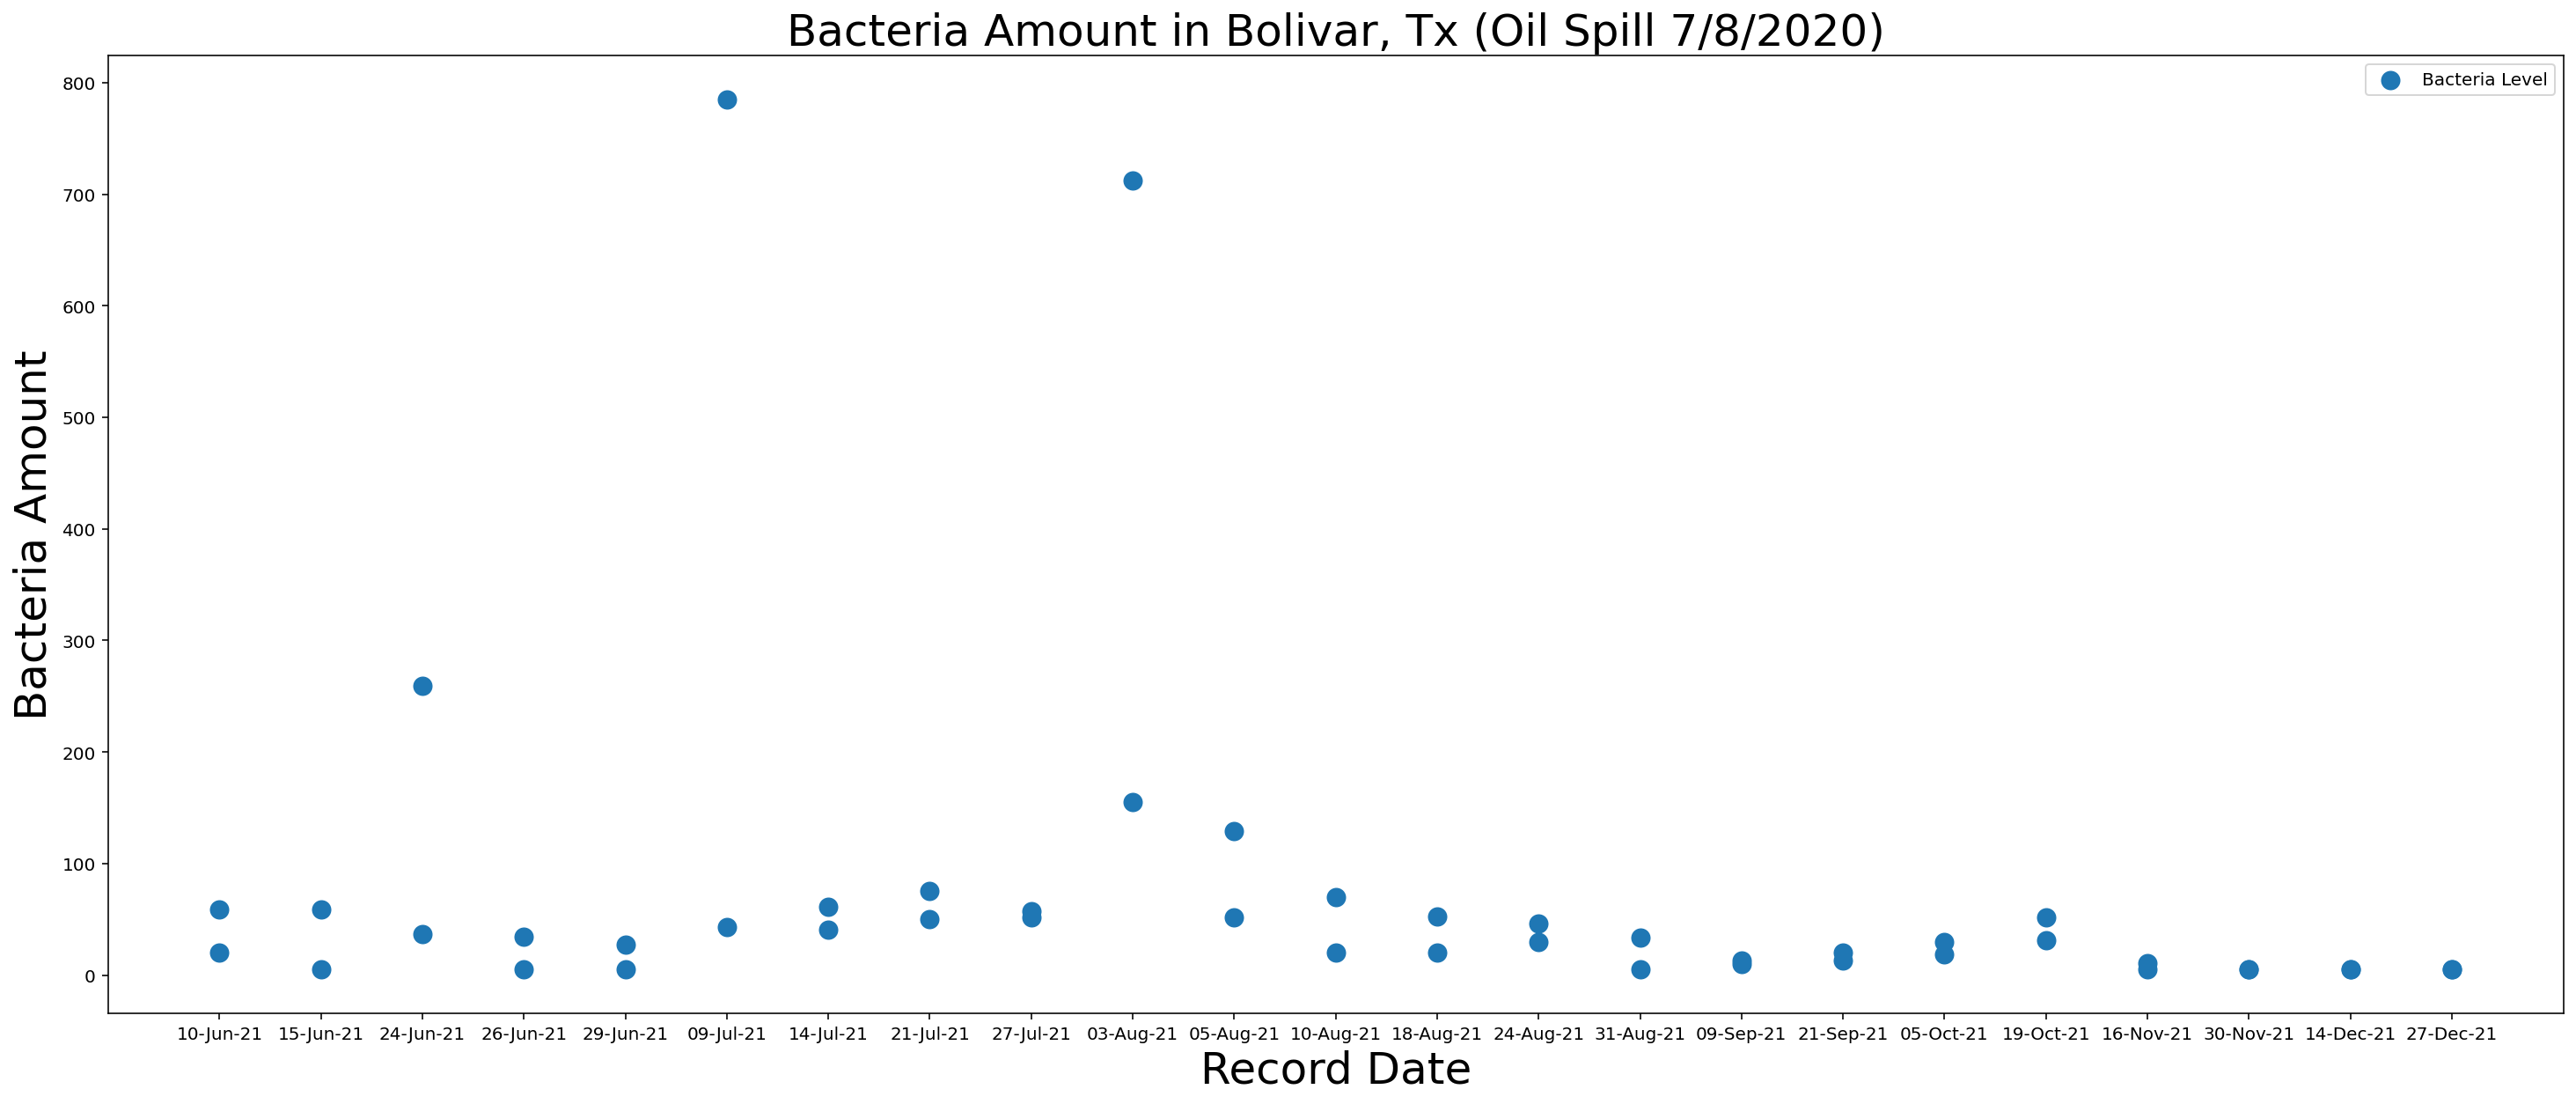

In [28]:
#Graph 4
ax4=Finaloil[Finaloil['Project ID']==4].plot.scatter(x='Record Date', y='Bacteria Amount',label="Bacteria Level",s=100,title="Bacteria Amount in Bolivar, Tx (Oil Spill 7/8/2020)",figsize=(25,10));
ax4.xaxis.label.set_fontsize(25)
ax4.yaxis.label.set_fontsize(25)
ax4.title.set_fontsize(25)

In [29]:
#Table 5
Finaloil[Finaloil['Project ID']==5]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
168,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,10-Jan-22,Enterococcus,24.0,MPN/100ml,2,2022-01-10,16417728.0
156,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,07-Feb-22,Enterococcus,22.0,MPN/100ml,2,2022-02-07,16441920.0
142,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,14-Mar-22,Enterococcus,6.0,MPN/100ml,2,2022-03-14,16472160.0
171,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,04-Apr-22,Enterococcus,10.0,MPN/100ml,2,2022-04-04,16490304.0
170,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,02-May-22,Enterococcus,6.0,MPN/100ml,2,2022-05-02,16514496.0
169,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,09-May-22,Enterococcus,24.0,MPN/100ml,2,2022-05-09,16520544.0
167,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,16-May-22,Enterococcus,227.0,MPN/100ml,2,2022-05-16,16526592.0
166,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,17-May-22,Enterococcus,2.0,MPN/100ml,2,2022-05-17,16527456.0
165,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,23-May-22,Enterococcus,50.0,MPN/100ml,2,2022-05-23,16532640.0
164,5,10322,AL197202,FOWL RIVER @ HW 193,"Mobile, Al",MOBILE,31-May-22,Enterococcus,8.0,MPN/100ml,2,2022-05-31,16539552.0


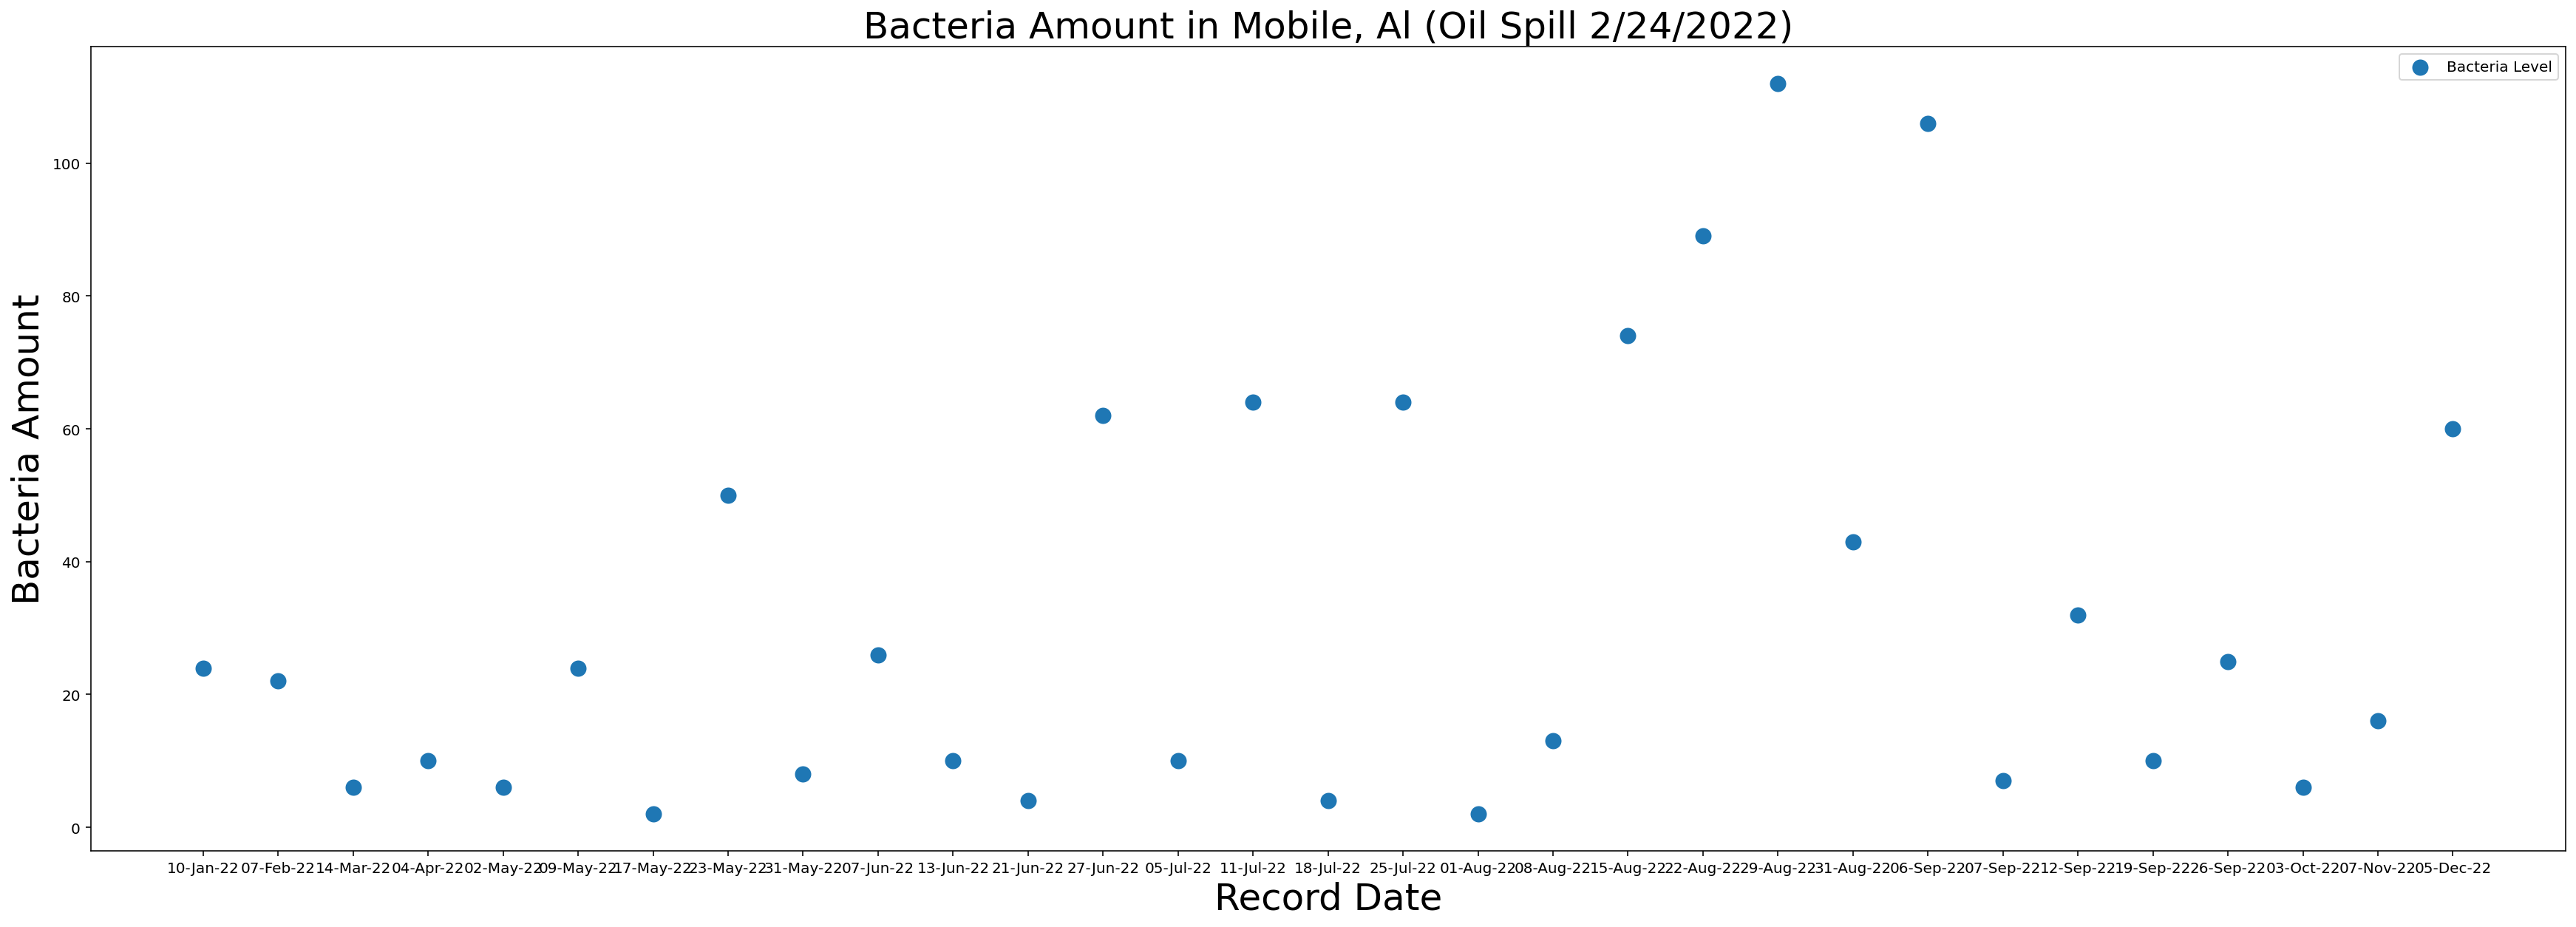

In [30]:
#Graph 5 - dropped an outlier, shows high in summer months and increase after oil spill
ax5=Finaloil[Finaloil['Project ID']==5].drop([167]).plot.scatter(x='Record Date', y='Bacteria Amount',s=100,label="Bacteria Level",title="Bacteria Amount in Mobile, Al (Oil Spill 2/24/2022)",figsize=(30,10));
ax5.xaxis.label.set_fontsize(25)
ax5.yaxis.label.set_fontsize(25)
ax5.title.set_fontsize(25)

In [31]:
#Table 6
Finaloil[Finaloil['Project ID']==6]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
196,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,03-Mar-21,Enterococcus,41.0,MPN/100ml,2,2021-03-03,16147296.0
195,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,15-Mar-21,Enterococcus,47.0,MPN/100ml,2,2021-03-15,16157664.0
194,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,29-Mar-21,Enterococcus,10.0,MPN/100ml,2,2021-03-29,16169760.0
193,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,12-Apr-21,Enterococcus,10.0,MPN/100ml,2,2021-04-12,16181856.0
192,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,26-Apr-21,Enterococcus,15.0,MPN/100ml,2,2021-04-26,16193952.0
191,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,11-May-21,Enterococcus,102.0,MPN/100ml,2,2021-05-11,16206912.0
190,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,13-May-21,Enterococcus,15.0,MPN/100ml,2,2021-05-13,16208640.0
189,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,26-May-21,Enterococcus,10.0,MPN/100ml,2,2021-05-26,16219872.0
188,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,07-Jun-21,Enterococcus,248.0,MPN/100ml,2,2021-06-07,16230240.0
187,6,-,FL352966,SHORELINE PARK,"Pensacola, Fl",Santa Rosa,09-Jun-21,Enterococcus,10.0,MPN/100ml,2,2021-06-09,16231968.0


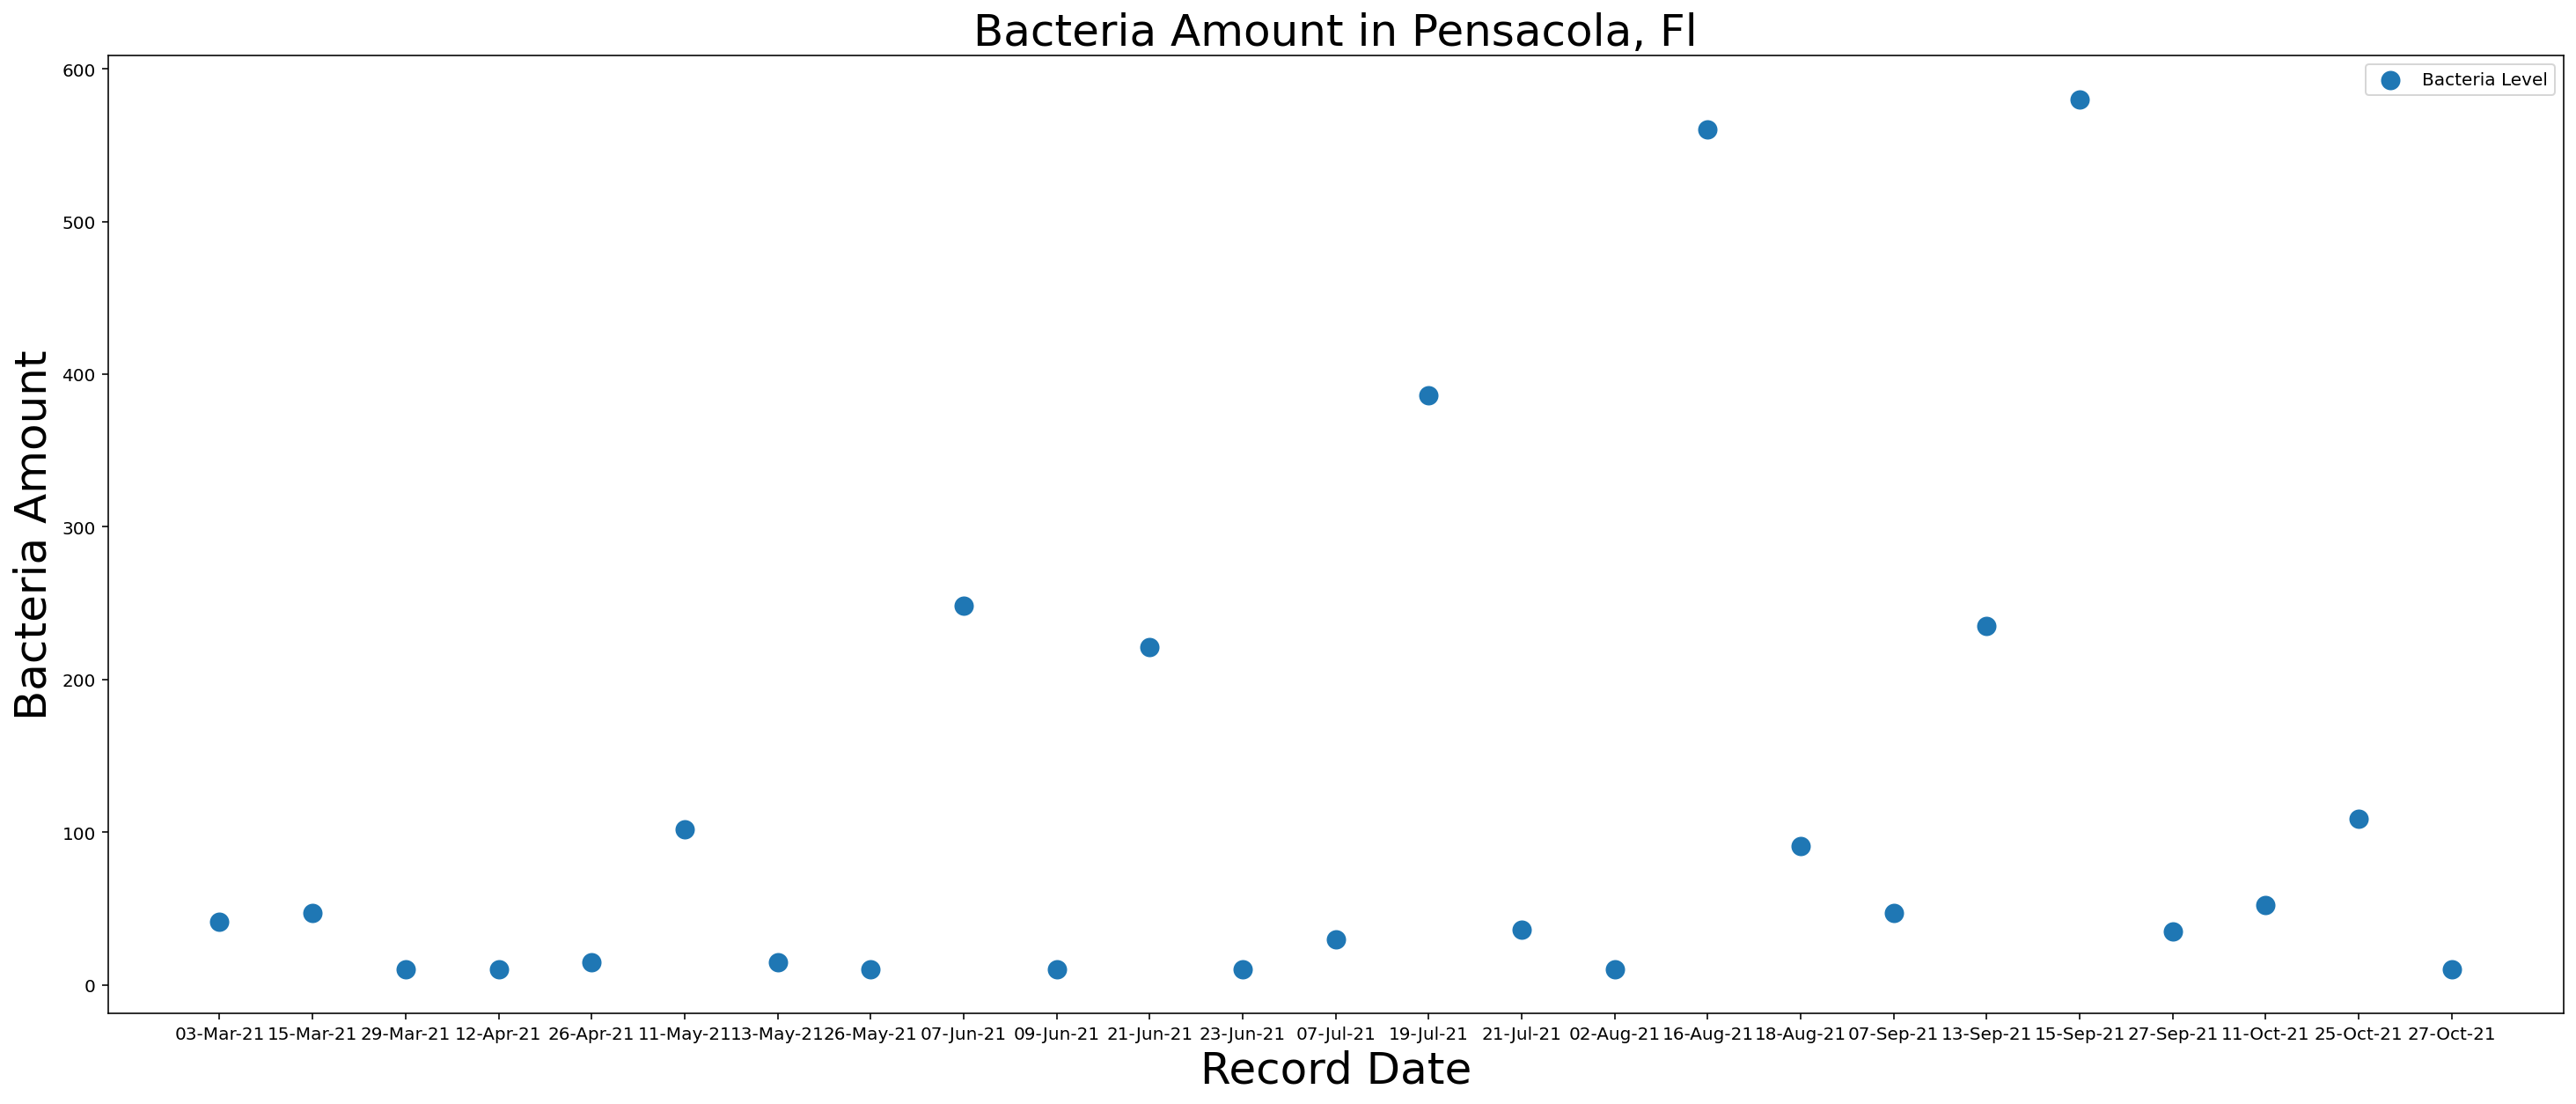

In [32]:
#Graph 6 - Tourism
ax6=Finaloil[Finaloil['Project ID']==6].plot.scatter(x='Record Date', y='Bacteria Amount',s=100,label="Bacteria Level",title="Bacteria Amount in Pensacola, Fl",figsize=(25,10));
ax6.xaxis.label.set_fontsize(25)
ax6.yaxis.label.set_fontsize(25)
ax6.title.set_fontsize(25)

In [33]:
#Table 7
Finaloil[Finaloil['Project ID']==7]

,Project ID,Oil Spill ID,Beach ID,Beach Name,City,County Name,Record Date,Bacteria Name,Bacteria Amount,Result Measure,Depth (ft),Date_dt,DateInt
219,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,16-Feb-21,Enterococcus,10.0,MPN/100ml,2,2021-02-16,16134336.0
218,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,02-Mar-21,Enterococcus,10.0,MPN/100ml,2,2021-03-02,16146432.0
217,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,16-Mar-21,Enterococcus,10.0,MPN/100ml,2,2021-03-16,16158528.0
216,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,30-Mar-21,Enterococcus,31.0,MPN/100ml,2,2021-03-30,16170624.0
215,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,13-Apr-21,Enterococcus,10.0,MPN/100ml,2,2021-04-13,16182720.0
214,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,27-Apr-21,Enterococcus,10.0,MPN/100ml,2,2021-04-27,16194816.0
213,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,11-May-21,Enterococcus,10.0,MPN/100ml,2,2021-05-11,16206912.0
212,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,25-May-21,Enterococcus,42.0,MPN/100ml,2,2021-05-25,16219008.0
211,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,08-Jun-21,Enterococcus,20.0,MPN/100ml,2,2021-06-08,16231104.0
210,7,-,FL138730,SOUTH BEACH,"Key West, Fl",Monroe,22-Jun-21,Enterococcus,999.0,MPN/100ml,2,2021-06-22,16243200.0


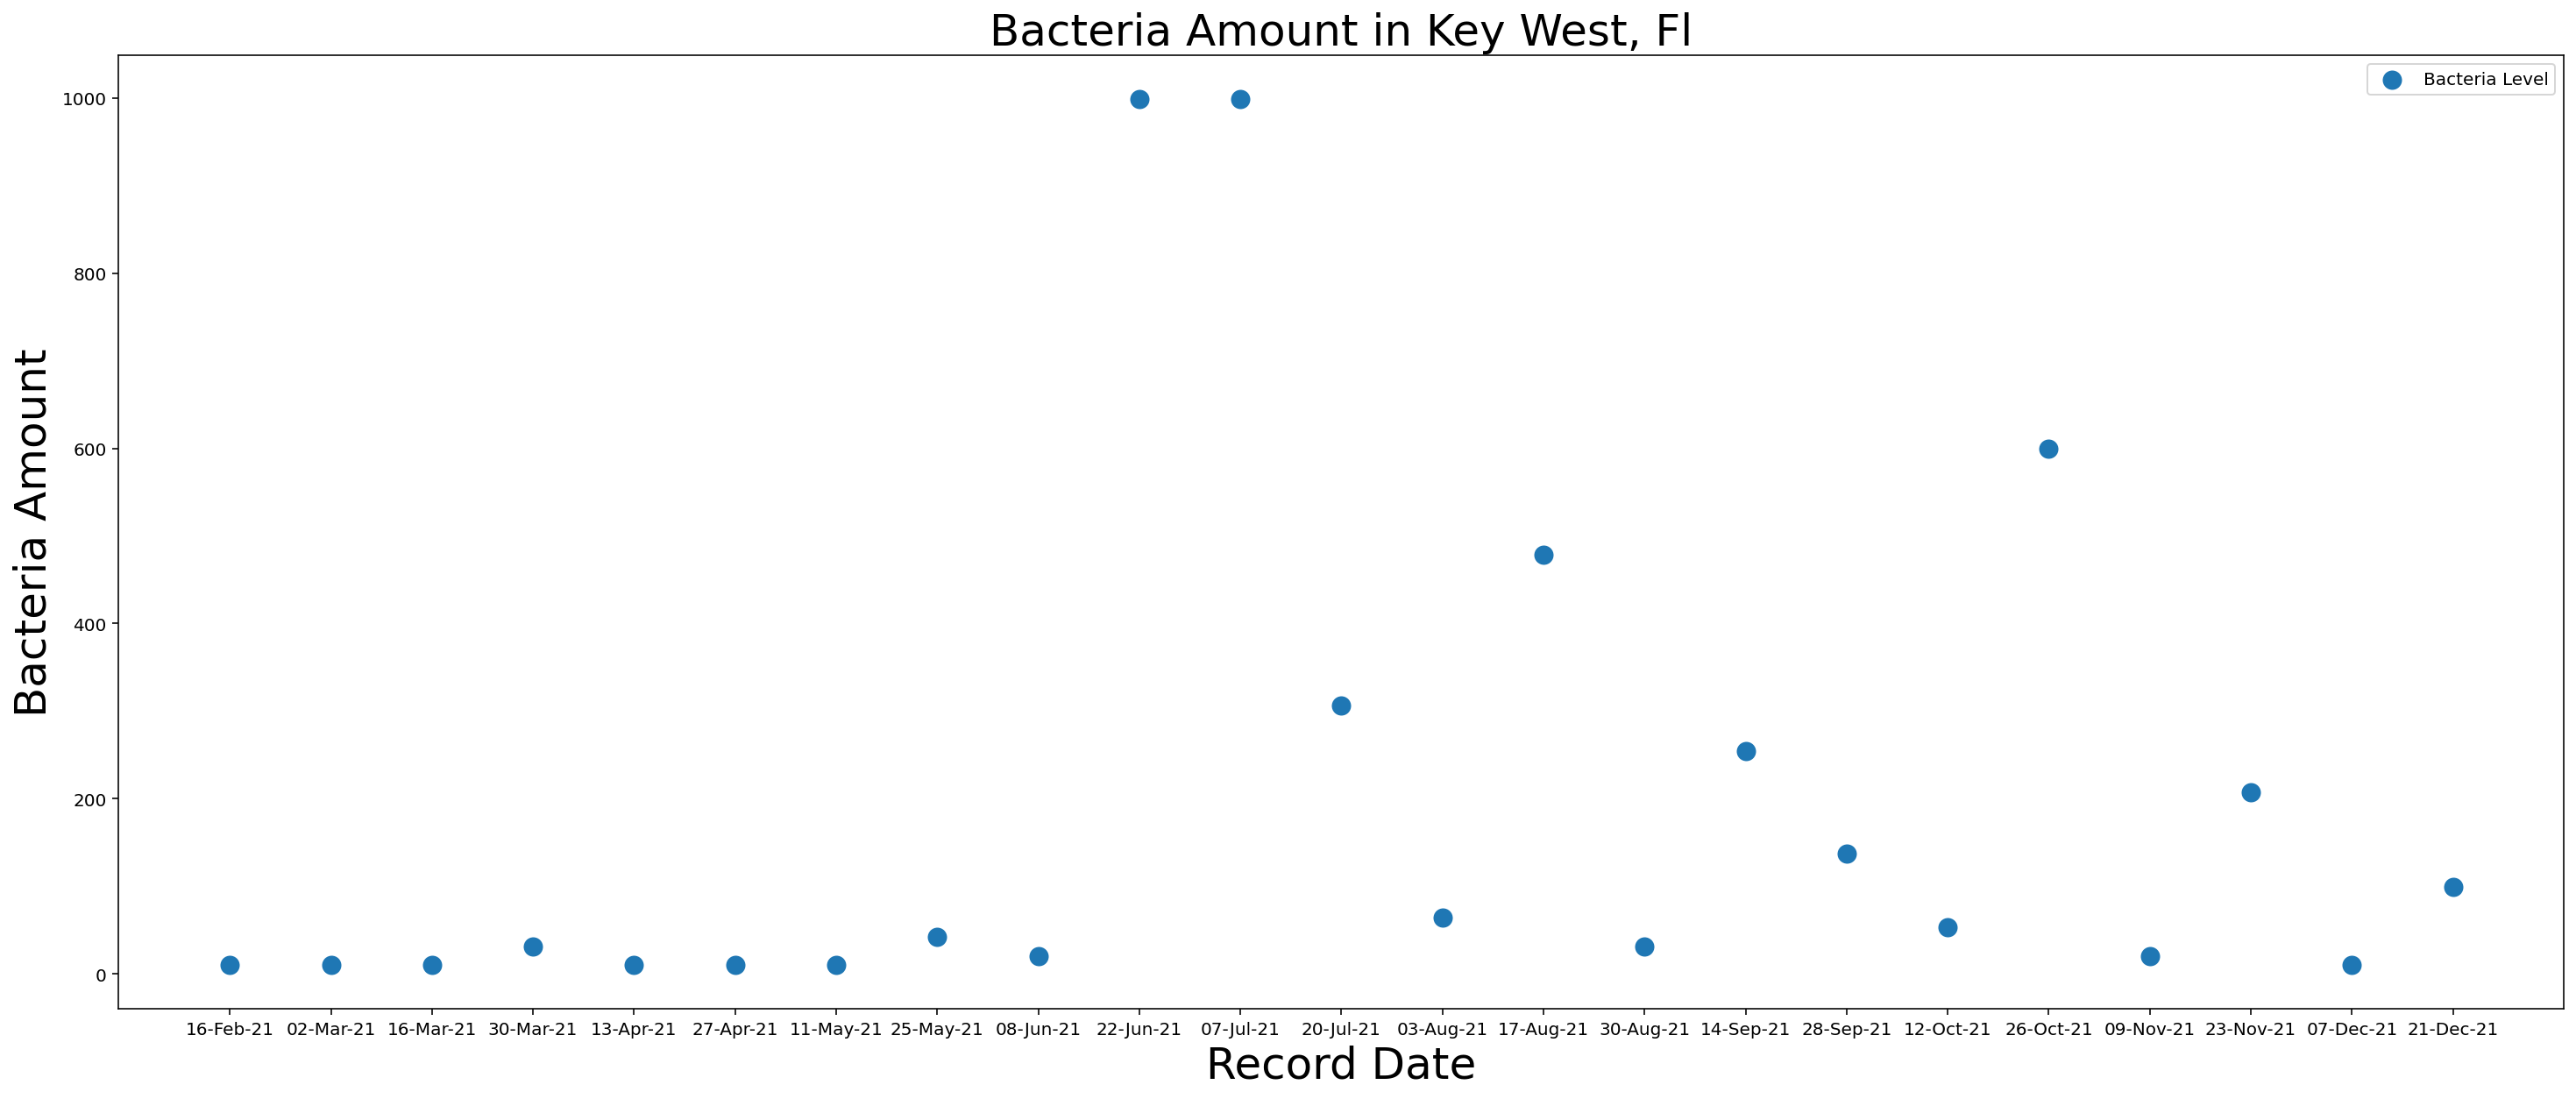

In [34]:
#Graph 7 - Tourism
ax7=Finaloil[Finaloil['Project ID']==7].plot.scatter(x='Record Date', y='Bacteria Amount',s=100,label="Bacteria Level",title="Bacteria Amount in Key West, Fl",figsize=(25,10));
ax7.xaxis.label.set_fontsize(25)
ax7.yaxis.label.set_fontsize(25)
ax7.title.set_fontsize(25)

In [35]:
ourdictionary={'Pensacola':[30.4213, -87.2169, 180],'Key West':[24.5554, -81.7842, 117],'Baytown':[29.7355, -94.9774,58],'Mobile':[30.6954, -88.0399, 38],'Corpus Christi':[27.8006, -97.3964, 318]}
ourdictionary

{'Pensacola': [30.4213, -87.2169, 180],
 'Key West': [24.5554, -81.7842, 117],
 'Baytown': [29.7355, -94.9774, 58],
 'Mobile': [30.6954, -88.0399, 38],
 'Corpus Christi': [27.8006, -97.3964, 318]}

In [36]:
coord=pd.DataFrame.from_dict(ourdictionary, orient='Index', columns=["Latitude","Longitude", "Averages"])
coord

,Latitude,Longitude,Averages
Pensacola,30.4213,-87.2169,180
Key West,24.5554,-81.7842,117
Baytown,29.7355,-94.9774,58
Mobile,30.6954,-88.0399,38
Corpus Christi,27.8006,-97.3964,318


In [37]:
latitude=coord['Latitude']
longitude=coord['Longitude']

<function matplotlib.pyplot.show(close=None, block=None)>

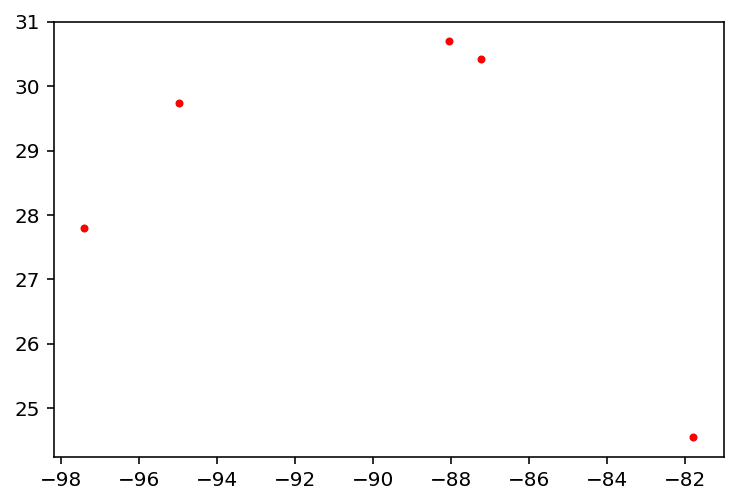

In [38]:
plt.scatter(longitude, latitude, marker='.', color='red')
plt.show

<AxesSubplot:>

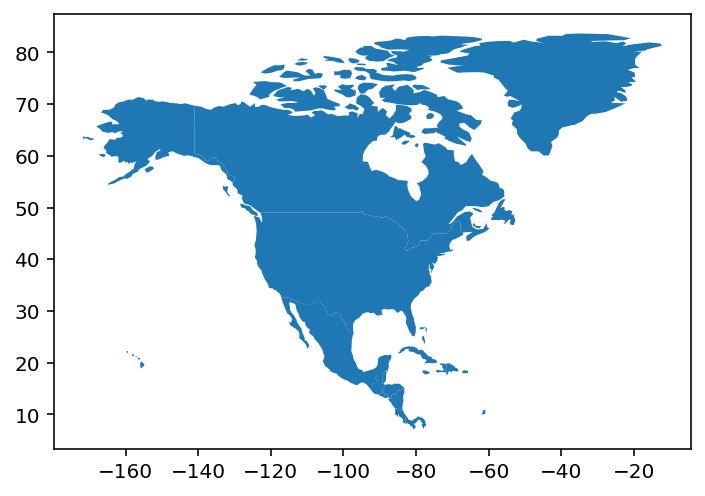

In [39]:
import geopandas as gpd
import geopandas as gpd

%config InlineBackend.figure_format ='retina' 
GulfCoast = gpd.read_file("../work/Something from Simon")
GulfCoast.plot()

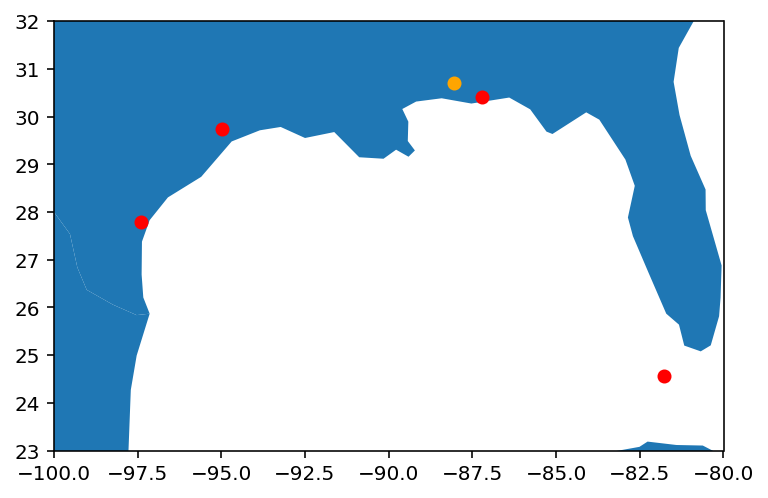

In [40]:
colors = []
for index, row in coord.iterrows():
    if row["Averages"] <= 10:
        colors.append("green")
    elif row["Averages"] <= 50:
        colors.append("orange")
    else:
        colors.append("red")

coord["Color"] = colors


# set the parameters of plot
desired_extent = (-100, -80, 23, 32)


ax = GulfCoast.plot()
ax.set_xlim(desired_extent[0], desired_extent[1])
ax.set_ylim(desired_extent[2], desired_extent[3])


for index, row in coord.iterrows():
    ax.scatter(row["Longitude"], row["Latitude"], color=row["Color"])

# label axis
#ax.set_xticks(range(-90, -59, 5))
# ax.set_xticklabels(['90°W','85°W','80°W','75°W','70°W','65°W', '60°W'])
# ax.set_yticks(range(20, 55, 5))
# ax.set_yticklabels(['20°N', '25°N', '30°N', '35°N', '40°N', '45°N', '50°N'])
# ax.set_xlabel('Longitude', fontsize=12)
# ax.set_ylabel('Latitude', fontsize=12)

#ax.grid()

# show the

plt.show()